In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
with open("result.json", "r") as f:
    data = json.load(f)
print(data)

{'name': 'Frontend vacancy | Frontend vakansiya', 'type': 'public_channel', 'id': 2044244385, 'messages': [{'id': 1, 'type': 'service', 'date': '2024-01-15T05:31:58', 'date_unixtime': '1705278718', 'actor': 'Frontend vacancy | Frontend vakansiya', 'actor_id': 'channel2044244385', 'action': 'create_channel', 'title': '.', 'text': '', 'text_entities': []}, {'id': 20, 'type': 'message', 'date': '2024-02-15T20:05:57', 'date_unixtime': '1708009557', 'edited': '2024-03-31T14:45:33', 'edited_unixtime': '1711878333', 'from': 'Frontend vacancy | Frontend vakansiya', 'from_id': 'channel2044244385', 'text': [{'type': 'bold', 'text': 'Assalom aleykum 👋'}, "\n\nBu kanalda siz Frontend vakansiyalarni eng yaxshilarini birinchilardan bo'lib kuzatib borish imkoniga egasiz!\n\n", {'type': 'mention', 'text': '@FrontendVacancy'}, ''], 'text_entities': [{'type': 'bold', 'text': 'Assalom aleykum 👋'}, {'type': 'plain', 'text': "\n\nBu kanalda siz Frontend vakansiyalarni eng yaxshilarini birinchilardan bo'lib

In [16]:
def body_split(body):
  body = body.lower()
  company = body.split("kompaniya:")[1].split("\n")[0] if "kompaniya:" in body else ""
  job_pattern = body.split("ish shakli:")[1].split("\n")[0] if "ish shakli:" in body else ""
  location = body.split("hudud:")[1].split("\n")[0] if "hudud:" in body else ""
  salary = body.split("maosh:")[1].split("\n")[0] if "maosh:" in body else ""
  experience = body.split("tajriba:")[1].split("\n")[0] if "tajriba:" in body else ""
  internship = body.split("amaliyot:")[1].split("\n")[0] if "amaliyot:" in body else ""
  return {"company":company,"job pattern":job_pattern,"location":location,"salary":salary,"experience":experience,"internship":internship}

In [17]:
proper_techs = ["react","vue","js","restful api","git","react.js", "vue.js","nuxt", "nuxt.js","next", "next.js", "angular", "svelte", "ember", "backbone", "jquery", "bootstrap", "tailwind", "materialize", "bulma", "foundation", "semantic-ui", "purecss", "css", "html", "javascript", "typescript", "redux", "vuex", "webpack", "babel", "gulp", "grunt", "parcel", "rollup", "sass", "less", "postcss", "eslint", "prettier", "jest", "mocha", "cypress", "storybook", "graphql", "apollo", "axios", "fetch", "d3", "three.js", "gsap", "webassembly", "pwa"]
# del len
# import builtins
# len = builtins.len
messages = data["messages"]
categorized_body_data = []
for message in messages:
    current_techs = []
    parts = message["text"]
    text_joined = " ".join([part.get("text","") if isinstance(part, dict) else part for part in parts])
    length = len(text_joined.split("\n\n"))
    technologies = text_joined.split("\n\n")[3] if length > 3 else ""
    position = text_joined.split("\n\n")[1] if length > 1 else ""
    body = text_joined.split("\n\n")[2] if length > 2 else ""
    # I am analysing only vacancy chanel named FrontEnd Vacancy, because there is one type of message
    # I will not need post_type
    categorized_body = body_split(body)
    categorized_body["date"] = message["date"]
    categorized_body["position"] = (position.lower()).split("\n")[0] if "lavozim:" else ""
    technologies = technologies.lower()
    # To select real vacancies below if statement is used
    if categorized_body["company"] != "" and categorized_body["location"]!="":
      for tech in proper_techs:
        if tech in technologies:
          current_techs.append(tech)
      current_techs = [tech.replace("react.js", "react")
             .replace("vue.js", "vue")
             .replace("nuxt.js", "nuxt")
             .replace("next.js", "next")
             .replace("javascript", "js")
         for tech in current_techs]
      categorized_body["technologies"] = current_techs
      categorized_body_data.append(categorized_body)

In [18]:
with open("categorized_body_data.json", "w") as f:
    json.dump(categorized_body_data, f)

<h1>I couldn't use ChatGPT or Data Analyst GPT, becuase it required to use <strong>Plus Version</strong>!</h1>
<p>So , below I tried to visualize the data and to  predict little.
 But available data is so less! </p>

In [19]:
technologies = []
dates = []
for entry in categorized_body_data:
    if entry.get('technologies') and entry.get('date'):
        techs = entry['technologies']
        date = entry['date']
        for tech in techs:
          technologies.append(tech)
          dates.append(date)

In [24]:
df = pd.DataFrame({'Technologies':technologies,"Date":dates})
df.head()

,Technologies,Date
0,vue,2024-03-14T08:11:36
1,js,2024-03-14T08:11:36
2,git,2024-03-14T08:11:36
3,nuxt,2024-03-14T08:11:36
4,nuxt,2024-03-14T08:11:36


In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

tech_year = df.groupby(['Technologies','Year']).size().unstack(fill_value=0)
tech_month = df.groupby(['Technologies','Month']).size().unstack(fill_value=0)
print(tech_month)

Month          3   4   5   6   7
Technologies                    
angular        1   2   2   0   1
axios          2   3   0   0   0
bootstrap      1  14   1   4   2
css            4  36  15   6  10
git            3  22  10   5   6
graphql        0   1   0   0   1
gsap           0   1   0   0   0
gulp           0   1   0   0   0
html           4  32  12   5  10
jquery         0   2   2   0   1
js            11  68  26  13  19
less           2   3   1   0   0
next           2  22   7   6   3
nuxt           2   6   6   2   1
pwa            0   1   0   0   0
react          5  38  13   9  14
redux          1   7   3   2   4
restful api    0   2   2   0   0
rollup         1   0   0   0   0
sass           3  16   5   2   1
tailwind       2  11   4   4   4
typescript     1  22   9   7   6
vue            2  16  12   2   2
vuex           0   3   2   0   0
webpack        1   2   0   0   0


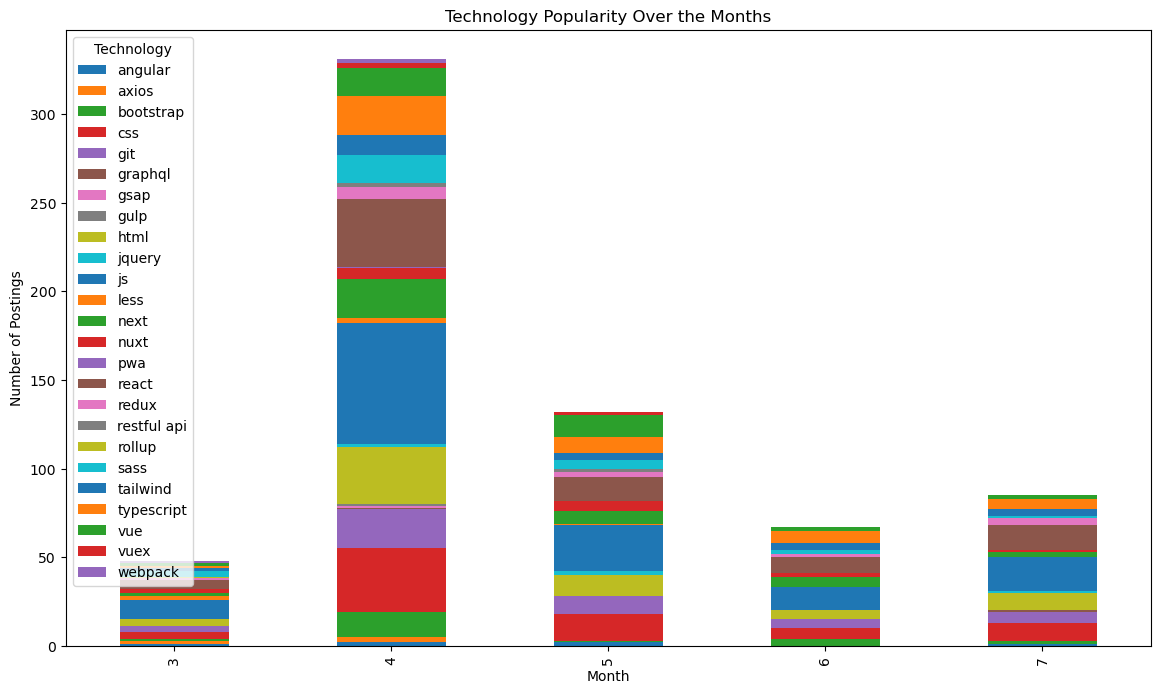

In [29]:
tech_month.T.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Technology Popularity Over the Months')
plt.xlabel('Month')
plt.ylabel('Number of Postings')
plt.legend(title='Technology')
plt.show()

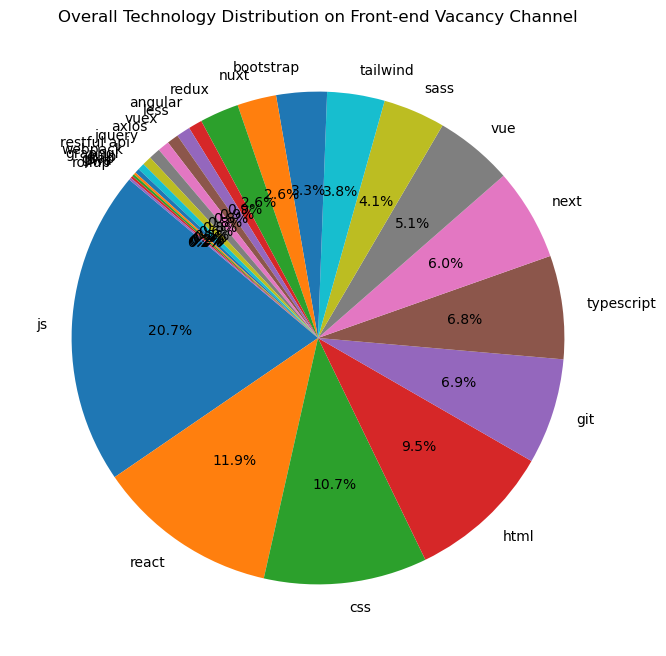

In [30]:
tech_total = df['Technologies'].value_counts()
tech_total.plot.pie(figsize=(8, 8), autopct='%1.1f%%', startangle=140)
plt.title('Overall Technology Distribution on Front-end Vacancy Channel')
plt.ylabel('')
plt.show()

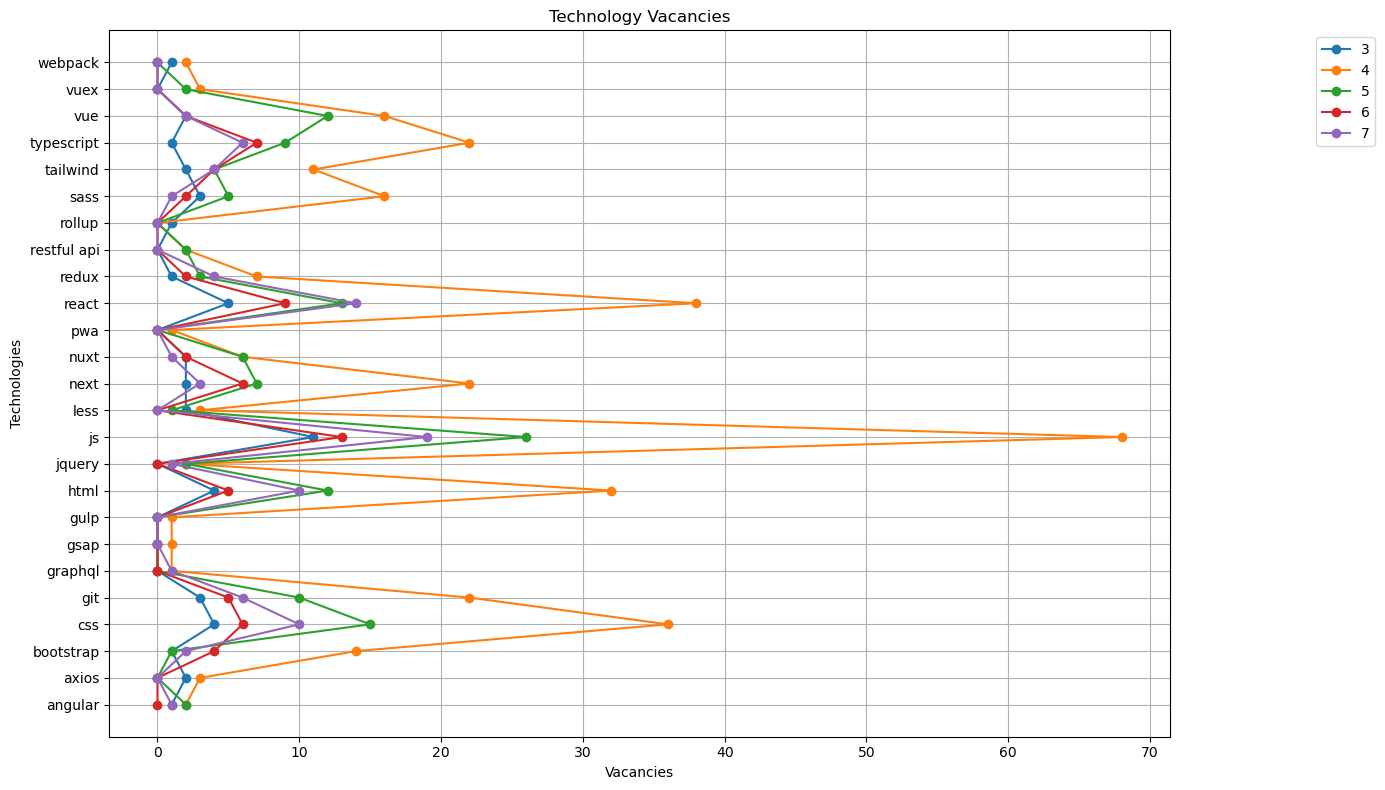

In [31]:
plt.figure(figsize=(14, 8))

for column in tech_month.columns:
    plt.plot(tech_month[column],tech_month.index, marker='o', label=column)

plt.title('Technology Vacancies')
plt.xlabel('Vacancies')
plt.ylabel('Technologies')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.tight_layout()
plt.show()
